In [1]:
import os, sys, shutil, copy
import random, math
import numpy as np
import json
import cv2
from matplotlib import pyplot as plt
sys.path.append("../")
%load_ext autoreload
%autoreload 2
from utils.utils import makeMini, myPlot, answerToPoints, meanTruth, newVals, iterMean
from scorer_scripts_v2.scorer_scripts_v2.score_detections import score
from starter_scripts_v2.starter_scripts_v2.helper import plot_bbox

In [2]:
p0 = '../labelling/trainingdata_7500_to_7999.json'
p1 = '../labelling/trainingdata_7500_to_7999_good.json'

with open(p0, 'r') as f:
    d0 = json.load(f)
with open(p1, 'r') as f:
    d1 = json.load(f)

In [21]:
diff_list = []
for k in d0.keys():
    v0 = d0[k][0]
    v1 = d1[k][0]
    diff = [a - b for a,b in zip(v0,v1)]
    changes = 8 - diff.count(0)
    b_change = 1 if changes > 0 else 0
    max_change = max([abs(x) for x in diff])
    sum_change = sum([abs(x) for x in diff])
    diff_list.append([str(k), v0, v1, copy.copy(diff), changes, b_change, max_change, sum_change])

In [22]:
print len(diff_list)
diff_list[:2]

500


[['IMG_8281 (1).JPG',
  [625, 435, 736, 463, 737, 644, 625, 646],
  [625, 435, 736, 463, 737, 644, 625, 646],
  [0, 0, 0, 0, 0, 0, 0, 0],
  0,
  0,
  0,
  0],
 ['IMG_8365.JPG',
  [544, 335, 765, 326, 767, 565, 544, 561],
  [542, 330, 767, 326, 771, 570, 544, 561],
  [2, 5, -2, 0, -4, -5, 0, 0],
  5,
  1,
  5,
  18]]

In [23]:
#num of bbox changed at all out of 500
sum([e[5] for e in diff_list])

406

In [25]:
#top3 coord changes
top_change = copy.deepcopy(diff_list)
top_change.sort(key=lambda e: e[6], reverse=True)
[[e[0], e[6]] for e in top_change[:3]]

[['IMG_8360.JPG', 95], ['IMG_8241 (1).JPG', 93], ['IMG_8370.JPG', 91]]

In [26]:
#top3 coord changes for abs-sum of all coords
top_change = copy.deepcopy(diff_list)
top_change.sort(key=lambda e: e[7], reverse=True)
[[e[0], e[7]] for e in top_change[:3]]

[['IMG_8296.JPG', 284], ['IMG_8360.JPG', 272], ['IMG_8370.JPG', 244]]

Bad-----------------


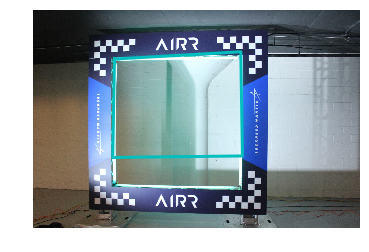

Good-----------------


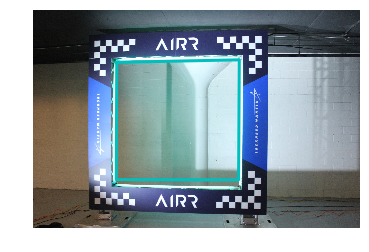

Bad-----------------


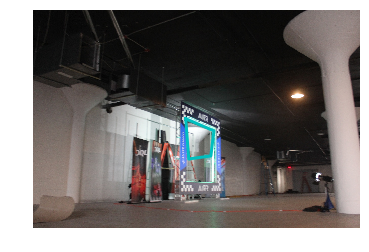

Good-----------------


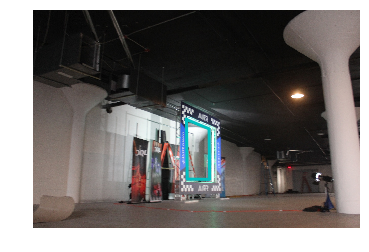

Bad-----------------


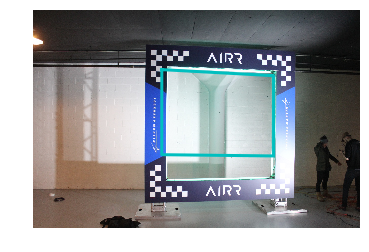

Good-----------------


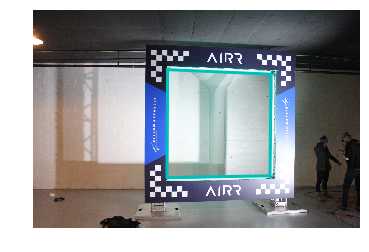

In [28]:
top_list = [['IMG_8360.JPG', 95], ['IMG_8241 (1).JPG', 93], ['IMG_8370.JPG', 91]]
p_training = '../Data_Training/Data_Training/'

for elem in top_list:
    fn = elem[0]
    bbox0 = d0[fn]
    bbox1 = d1[fn]
    img = cv2.imread(p_training + fn)
    img = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)
    print 'Bad-----------------'
    plot_bbox(img, bbox0)
    plt.show()
    print 'Good-----------------'
    plot_bbox(img, bbox1)
    plt.show()

In [32]:
no_change_list  = filter(lambda e: e[5] == 0, diff_list)

In [33]:
rand_no_change = random.sample(no_change_list, 5)
[e[0] for e in rand_no_change]

['IMG_8314.JPG',
 'IMG_8237 (1).JPG',
 'IMG_8375.JPG',
 'IMG_8430 (1).JPG',
 'IMG_8393.JPG']

Already good-----------------


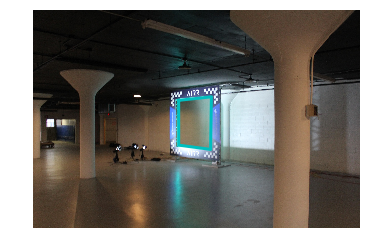

Already good-----------------


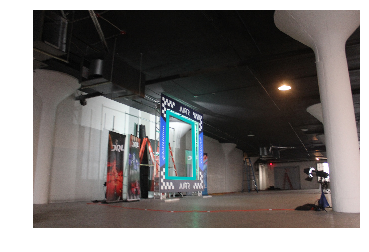

Already good-----------------


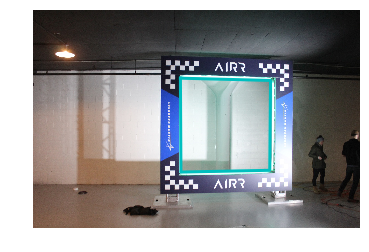

Already good-----------------


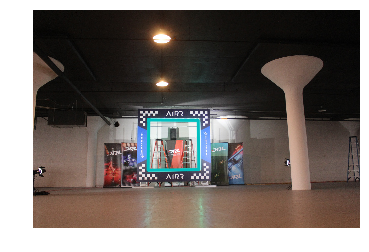

Already good-----------------


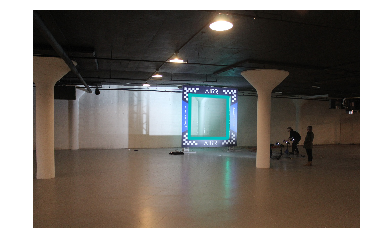

In [42]:
p_training = '../Data_Training/Data_Training/'

for elem in rand_no_change:
    fn = elem[0]
    bbox0 = d0[fn]
    img = cv2.imread(p_training + fn)
    img = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)
    print 'Already good-----------------'
    plot_bbox(img, bbox0)
    plt.show()